In [2]:
!pip install kaggle

Importing **Splitting Filker face dataset**

In [3]:
!kaggle datasets download -d tommykamaz/faces-dataset-small

Dataset URL: https://www.kaggle.com/datasets/tommykamaz/faces-dataset-small
License(s): Attribution 4.0 International (CC BY 4.0)
100% 3.99G/3.99G [00:56<00:00, 95.0MB/s]
100% 3.99G/3.99G [00:56<00:00, 76.3MB/s]


In [4]:
import zipfile
import os

zip_file_path = '/content/faces-dataset-small.zip'
extract_path = '/content/real_face/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed!")


Unzipping completed!


In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [6]:
real_face_dataset = '/content/real_face/faces_dataset_small'

In [7]:
def show_samples(image_folder, num_samples=5):
    # Get a list of all images in the specified folder
    all_images = os.listdir(image_folder)

    # Randomly select a few images to display
    selected_images = random.sample(all_images, num_samples)

    # Plot the selected images
    plt.figure(figsize=(15, 6))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(image_folder, img_name)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_samples, i + 1)  # Create a subplot for each image
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title(img_name)  # Show the image name as title

    plt.tight_layout()
    plt.show()

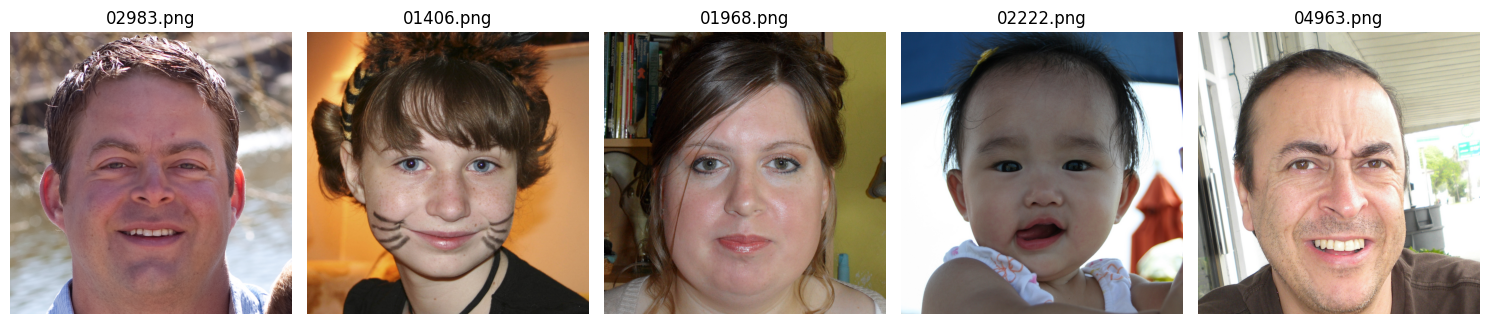

In [8]:
show_samples(real_face_dataset, num_samples=5)

Splitting Filker face dataset to train test datasets

In [9]:
import shutil
from sklearn.model_selection import train_test_split

In [10]:
real_face_dataset = '/content/real_face'
train_dir = '/content/real_face_dataset/train/'
test_dir = '/content/real_face_dataset/test/'

In [11]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [12]:
classes = os.listdir(real_face_dataset)

In [13]:
for class_name in classes:
    class_path = os.path.join(real_face_dataset, class_name)

    # Skip if it's not a directory (class folder)
    if not os.path.isdir(class_path):
        continue

    # Create corresponding train/test directories for this class
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # List all images in the class folder
    images = os.listdir(class_path)

    # Split the images into train (80%) and test (20%) sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Move the images to their respective folders
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset has been split into training and testing sets!")

Dataset has been split into training and testing sets!


Loading The **Synthetic Faces High Quality** (SHFQ)

In [14]:
!pip install torchvision

In [15]:
!kaggle datasets download -d selfishgene/synthetic-faces-high-quality-sfhq-part-2


Dataset URL: https://www.kaggle.com/datasets/selfishgene/synthetic-faces-high-quality-sfhq-part-2
License(s): CC0-1.0
100% 13.5G/13.5G [03:17<00:00, 94.0MB/s]
100% 13.5G/13.5G [03:17<00:00, 73.5MB/s]


In [16]:
import zipfile
import os

zip_file_path = '/content/synthetic-faces-high-quality-sfhq-part-2.zip'
extract_path = '/content/synthetic_faces_dataset/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed!")


Unzipping completed!


In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

In [18]:
dataset_path = '/content/synthetic_faces_dataset/a small sample (650 images)'


In [19]:
def display_images(num_images=5):
    images = []
    image_files = os.listdir(dataset_path)

    # Load the specified number of images
    for i in range(min(num_images, len(image_files))):
        img_path = os.path.join(dataset_path, image_files[i])
        img = Image.open(img_path).convert("RGB")  # Open image and convert to RGB
        images.append(img)

    # Display the images
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

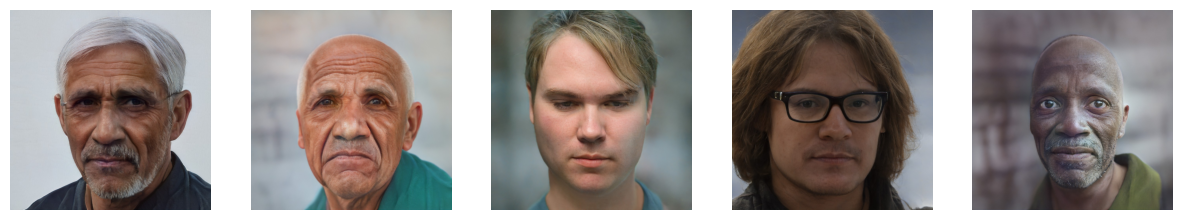

In [20]:
display_images(num_images=5)

Splitting into train test data set

In [21]:
dataset_dir = '/content/synthetic_faces_dataset/a small sample (650 images)'
train_dir = '/content/synthetic_faces_dataset/train/'
test_dir = '/content/synthetic_faces_dataset/test/'

In [22]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [23]:
image_extensions = ['.jpg', '.jpeg', '.png']

# List all image files in the dataset directory
images = [img for img in os.listdir(dataset_dir) if os.path.splitext(img)[1].lower() in image_extensions]



In [24]:
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

# Move the images to their respective train/test directories
for img in train_images:
    shutil.move(os.path.join(dataset_dir, img), os.path.join(train_dir, img))

for img in test_images:
    shutil.move(os.path.join(dataset_dir, img), os.path.join(test_dir, img))

print("Dataset has been split into training and testing sets!")

Dataset has been split into training and testing sets!


In [25]:
!rm -rf /content/real_face_dataset/train/.ipynb_checkpoints
!rm -rf /content/synthetic_faces_dataset/train/.ipynb_checkpoints


In [26]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data transformations (normalization, augmentation)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip images
    transforms.ToTensor(),            # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize based on ImageNet mean and std
])

# Custom dataset class
class CustomImageDataset(Dataset):
    def __init__(self, directory, label):
        self.directory = directory
        self.label = label
        self.image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if is_valid_image_file(fname)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = data_transforms(image)
        return image, self.label

def is_valid_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Paths to training datasets
real_face_train_dir = '/content/real_face_dataset/train/faces_dataset_small'
synthetic_face_train_dir = '/content/synthetic_faces_dataset/train'

# Create datasets for real and synthetic faces
real_dataset = CustomImageDataset(real_face_train_dir, label=0)  # Label 0 for real faces
synthetic_dataset = CustomImageDataset(synthetic_face_train_dir, label=1)  # Label 1 for synthetic faces

# Combine both datasets
train_dataset = torch.utils.data.ConcatDataset([real_dataset, synthetic_dataset])

# DataLoader for training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Load pre-trained DenseNet121
model = models.densenet121(pretrained=True)

# Modify the classifier part of the DenseNet to fit binary classification
num_ftrs = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, 1),
    nn.Sigmoid()  # Output layer for binary classification (real vs synthetic)
)

# Move model to the device (GPU or CPU)
model = model.to(device)

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        # Move inputs and labels to device (GPU or CPU)
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)  # Convert labels to float and reshape for BCE Loss

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        preds = (outputs > 0.5).float()  # Convert sigmoid output to binary (0 or 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

# Save the trained model
torch.save(model.state_dict(), 'densenet_face_classification.pth')

print("Model training completed and saved!")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 88.1MB/s]


Epoch 0/9, Loss: 0.1821, Accuracy: 0.9324
Epoch 1/9, Loss: 0.1034, Accuracy: 0.9581
Epoch 2/9, Loss: 0.0938, Accuracy: 0.9670
Epoch 3/9, Loss: 0.0648, Accuracy: 0.9740
Epoch 4/9, Loss: 0.0556, Accuracy: 0.9799
Epoch 5/9, Loss: 0.0645, Accuracy: 0.9763
Epoch 6/9, Loss: 0.0395, Accuracy: 0.9865
Epoch 7/9, Loss: 0.0331, Accuracy: 0.9885
Epoch 8/9, Loss: 0.0431, Accuracy: 0.9858
Epoch 9/9, Loss: 0.0343, Accuracy: 0.9871
Model training completed and saved!


In [27]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data transformations (same as training)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224x224
    transforms.ToTensor(),            # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize based on ImageNet mean and std
])

# Custom dataset class for test data
class CustomImageDataset(Dataset):
    def __init__(self, directory, label):
        self.directory = directory
        self.label = label
        self.image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if is_valid_image_file(fname)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = data_transforms(image)
        return image, self.label

def is_valid_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Paths to test datasets
real_face_test_dir = '/content/real_face_dataset/test/faces_dataset_small'
synthetic_face_test_dir = '/content/synthetic_faces_dataset/test'

# Create datasets for test data
real_test_dataset = CustomImageDataset(real_face_test_dir, label=0)  # Label 0 for real faces
synthetic_test_dataset = CustomImageDataset(synthetic_face_test_dir, label=1)  # Label 1 for synthetic faces

# Combine both test datasets
test_dataset = torch.utils.data.ConcatDataset([real_test_dataset, synthetic_test_dataset])

# DataLoader for testing
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the trained model
model = models.densenet121(pretrained=False)
num_ftrs = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load('densenet_face_classification.pth'))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Evaluate the model
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for evaluation
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).float().unsqueeze(1)  # Convert labels to float and reshape for BCE Loss

        # Forward pass
        outputs = model(inputs)

        # Predictions
        preds = (outputs > 0.5).float()  # Convert sigmoid output to binary (0 or 1)

        # Statistics
        total += labels.size(0)
        correct += (preds == labels.data).sum().item()

# Calculate accuracy
accuracy = correct / total * 100
print(f'Test Accuracy: {accuracy:.2f}%')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-27-3e81cdf6be91>:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomme

Test Accuracy: 93.94%
